SUITABLE = False


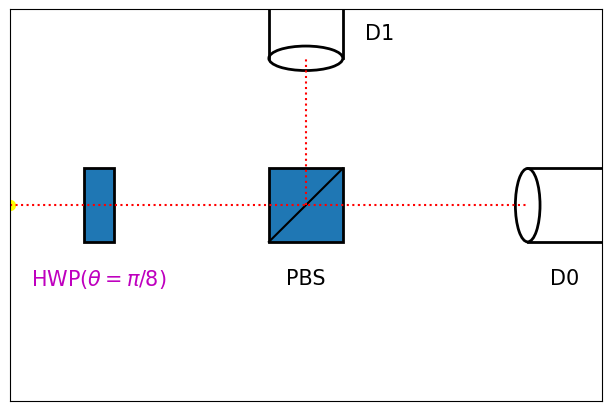

In [35]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from qutip import basis
from matplotlib.patches import Ellipse, Rectangle


def animate_quantum_channel(qubit_alice_sent, qubit_bob_measured, basis):

    fontsize = 15
    # Function to assign qubit labels
    def get_label(qubit):
        if qubit == ket0:
            return r'$|0\rangle$'
        elif qubit == ket1:
            return r'$|1\rangle$'
        elif qubit == ket_p:
            return r'$|+\rangle$'
        elif qubit == ket_m:
            return r'$|-\rangle$'
        else:
            raise ValueError("Invalid qubit input")

    


    # Assign labels
    label_alice = get_label(qubit_alice_sent)
    label_bob = get_label(qubit_bob_measured)


    if basis == 'h' and qubit_alice_sent in [ket0, ket1]:
        suitable = False

    elif basis == 'c' and label_alice in [ket_p, ket_m]:
        suitable = False
    else:
        suitable = True
    

    print(f"SUITABLE = {suitable}")



    # Plot setup
    fig, ax = plt.subplots(figsize=(6, 4), constrained_layout = True)

    extent_x = 6  # +/- extent_x
    extent_y = 4  # +/- extent_y


    ax.set_xlim(-extent_x, extent_x)
    ax.set_ylim(-extent_y, extent_y)


    ### Draw the landscape

    # PBS
    pbs_width = extent_x * 0.25
    pbs_height = pbs_width

    pbs = Rectangle(xy = (-pbs_width/2, -pbs_height/2), width = pbs_width, height = pbs_height, lw =2, ec = 'k')
    ax.add_patch(pbs)

    plt.plot([-pbs_width/2, pbs_width/2],[-pbs_height/2, pbs_height/2], c = 'k')
    ax.text(0, -pbs_height, r"PBS", ha="center", va="center", fontsize=fontsize)







    #HWP

    hwp_width = extent_x * 0.1
    hwp_height = pbs_height

    hwp = Rectangle(xy = (-extent_x * 0.75, -pbs_height/2), width = hwp_width, height = hwp_height, lw =2, ec = 'k')
    ax.add_patch(hwp)
    

    if basis == "h":
        ax.text(-extent_x * 0.75 + hwp_width/2, -pbs_height, r"HWP($\theta = \pi/8$)", ha="center", va="center", fontsize=fontsize, c = 'm')
    else:
        ax.text(-extent_x * 0.75 + hwp_width/2, -pbs_height, r"HWP($\theta = 0$)", ha="center", va="center", fontsize=fontsize, c = 'm')



    # Right detector:
    x_detector = extent_x * 0.75
    detector_width = pbs_height/3
    detector_height = pbs_height

    right_detector = Ellipse((x_detector, 0), detector_width, detector_height,
                ec='k', facecolor='none', lw=2)
    ax.plot([x_detector, extent_x], [detector_height/2, detector_height/2], lw=2, c='k')
    ax.plot([x_detector, extent_x], [-detector_height/2, -detector_height/2], lw=2, c='k')

    ax.add_patch(right_detector)

    ax.text((x_detector + extent_x)/2, -pbs_height, r"D0", ha="center", va="center", fontsize=fontsize)



    # Top detector:
    y_detector = extent_y * 0.75
    detector_width = pbs_height
    detector_height = pbs_height/3

    top_detector = Ellipse((0, y_detector), detector_width, detector_height,
                ec='k', facecolor='none', lw=2)
    ax.plot([-detector_width/2, -detector_width/2], [y_detector, extent_y], lw=2, c='k')
    ax.plot([detector_width/2, detector_width/2], [y_detector, extent_y], lw=2, c='k')

    ax.add_patch(top_detector)

    ax.text(pbs_width, (y_detector + extent_y)/2, r"D1", ha="center", va="center", fontsize=fontsize)


    # Path lines

    plt.plot([-extent_x, x_detector],[0,0], linestyle = "dotted", c = 'r')
    plt.plot([0,0], [0, y_detector], linestyle = 'dotted', c = 'r')





    # Animation specific stuff

    
    # Step 0: incident on the PBS

    x = np.linspace(-extent_x, 0, 50)
    y = np.zeros(len(x))

    
    

    if suitable:

        if qubit_alice_sent in [ket0, ket_p]:


    
            #Go right
            rightward_x = np.linspace(0, x_detector, 50)
            rightward_y = np.zeros(len(rightward_x))

            x = np.concatenate((x, rightward_x),)
            y = np.concatenate((y, rightward_y),)
        else:

            # Go up

            upward_y = np.linspace(0, y_detector, 50)
            upward_x = np.zeros(len(upward_y))

            x = np.concatenate((x, upward_x),)
            y = np.concatenate((y, upward_y),)


    else:

        # Bad measurement, go both directions



        #Go right
        rightward_x = np.linspace(0, x_detector, 50)
        rightward_y = np.zeros(len(rightward_x))

        x = np.concatenate((x, rightward_x),)
        y = np.concatenate((y, rightward_y),)


        # Also, go up (using other scatter object)
        x_in = np.array([0] * 50)
        y_in = np.zeros(len(x_in)) 
         

        # Need to buffer front part of particle trajectory

        x_in = np.concatenate((x_in, np.zeros(len(y_in))),)
        y_in = np.concatenate((y_in, np.linspace(0, y_detector, 50)),)

    scatter = ax.scatter(x[0], y[0], c="yellow", s=50)
    if not suitable:
        insuitable_scatter = ax.scatter(x_in[0], y_in[0], c="yellow", s=50)


    # Both


    def update(frame):
        if frame < len(x) -1:
            scatter.set_offsets([x[frame], y[frame]])
            
            if not suitable:

                if frame > 49:
                    insuitable_scatter.set_visible(True)
                else:
                    insuitable_scatter.set_visible(False)


                insuitable_scatter.set_offsets([x_in[frame], y_in[frame]])

        else:
            pass
        pass


    # Just in case...
    ax.set_xticks([])
    ax.set_yticks([])

    ax.set_autoscale_on(False)

    ani = animation.FuncAnimation(fig, update, frames=len(x), interval=100)
    
    filename = f'photon.mp4'
    
    ani.save(filename, fps=60, writer='ffmpeg')


# --- Example usage ---
ket0 = basis(2, 0)
ket1 = basis(2, 1)
ket_p = (ket0 + ket1)/np.sqrt(2)
ket_m = (ket0 - ket1)/np.sqrt(2)

qubit_alice_sent = ket1
qubit_bob_measured = ket_m

animate_quantum_channel(qubit_alice_sent, qubit_bob_measured, basis = "h")


SUITABLE = False


'what.mp4'

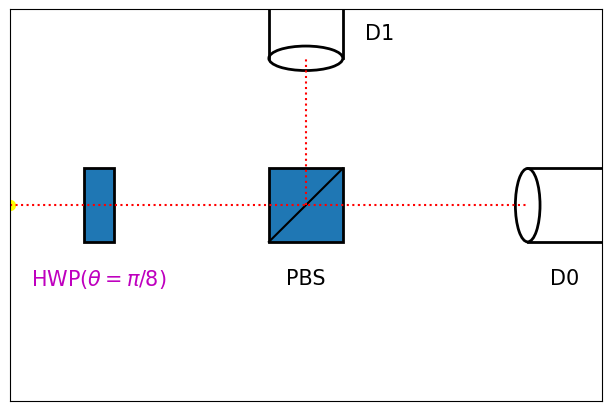

In [37]:
from utilities import animate_quantum_channel
animate_quantum_channel(qubit_alice_sent, qubit_bob_measured, basis = "h")
